In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import sys
sys.path.insert(0, '/home/mritter/code/preposterous')

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
import scipy.stats
import preposterous.preposterous as pp

In [35]:
pdf = pp.PrePostDF()
pdf.add_intervention(filename='data/reporter20180902.csv')
pdf.add_outcome(filename='data/reporter20180902.csv')

/home/mritter/.local/share/virtualenvs/preposterous-9I4DbeKd/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [36]:
pdf.basic_info()

Earliest recording: 2018.07.04
Latest recording: 2018.08.09
Recordings per day: 20.3

Outcomes with n>5:
                          n   pct
                        225  0.60
Noticeable- definitely   51  0.14
Totally fine             36  0.10
Noticeable- barely       35  0.09
Distracting              28  0.07

Interventions with n>5:
                             n   pct
Tums1x                      18  0.15
Tummy Drop (1ct)            15  0.12
Nex                         14  0.12
GinGin2x                    14  0.12
Ginger tea                  13  0.11
Motion sickness medication   8  0.07
Tummy Drop (2ct)             7  0.06
Peppermint TD (2ct)          7  0.06
Mineral water                6  0.05

Long dataframe tail:
                    intervention      outcome
2018-07-07 13:49:51          NaN  Distracting
2018-07-15 11:01:27          NaN  Distracting
2018-07-15 11:01:27          NaN  Distracting
2018-07-17 10:36:46          NaN             
2018-07-17 10:36:46          NaN            

In [37]:
pdf.outcomes(
    positive_outcomes=['Totally fine', 'Noticeable- barely'],
    negative_outcomes=['Noticeable- definitely', 'Distracting'],
    window=3
)

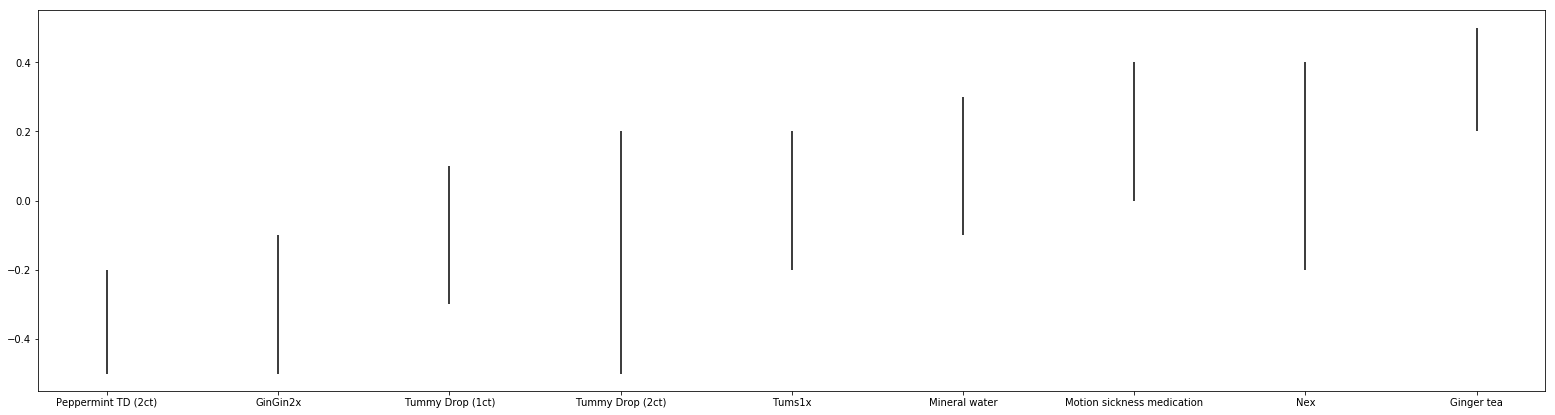

In [38]:
pdf.calculate_relative_effectiveness()
_ = pdf.plot_relative_effectiveness()

In [18]:
pdf.relative_effectiveness

intervention  GinGin2x  Ginger tea  Mineral water  Motion sickness medication  \
delta                                                                           
-0.9              0.00        0.00           0.00                        0.00   
-0.8              0.00        0.00           0.00                        0.00   
-0.7              0.00        0.00           0.00                        0.00   
-0.6              0.04        0.00           0.00                        0.00   
-0.5              0.19        0.00           0.00                        0.00   
-0.4              0.23        0.00           0.00                        0.00   
-0.3              0.22        0.00           0.01                        0.00   
-0.2              0.14        0.00           0.03                        0.01   
-0.1              0.08        0.00           0.08                        0.03   
 0.0              0.05        0.01           0.17                        0.06   
 0.1              0.02        0.04           0.26                        0.11   
 0.2              0.01        0.07           0.23                        0.16   
 0.3              0.00        0.15           0.14                        0.22   
 0.4              0.00        0.31           0.06                        0.22   
 0.5              0.00        0.31           0.02                        0.15   
 0.6              0.00        0.10           0.00                        0.03   
 0.7              0.00        0.01           0.00                        0.00   
 0.8              0.00        0.00           0.00                        0.00   
 0.9              0.00        0.00           0.00                        0.00   

intervention   Nex  Peppermint TD (2ct)  Tummy Drop (1ct)  Tummy Drop (2ct)  \
delta                                                                         
-0.9          0.00                 0.00              0.00              0.00   
-0.8          0.00                 0.00              0.00              0.00   
-0.7          0.00                 0.00              0.00              0.00   
-0.6          0.00                 0.01              0.00              0.01   
-0.5          0.00                 0.09              0.01              0.09   
-0.4          0.01                 0.24              0.04              0.14   
-0.3          0.02                 0.31              0.10              0.14   
-0.2          0.04                 0.21              0.17              0.14   
-0.1          0.06                 0.10              0.21              0.14   
 0.0          0.11                 0.04              0.20              0.13   
 0.1          0.16                 0.01              0.15              0.08   
 0.2          0.17                 0.00              0.07              0.05   
 0.3          0.17                 0.00              0.03              0.03   
 0.4          0.16                 0.00              0.01              0.02   
 0.5          0.09                 0.00              0.00              0.01   
 0.6          0.01                 0.00              0.00              0.00   
 0.7          0.00                 0.00              0.00              0.00   
 0.8          0.00                 0.00              0.00              0.00   
 0.9          0.00                 0.00              0.00              0.00   

intervention  Tums1x  
delta                 
-0.9            0.00  
-0.8            0.00  
-0.7            0.00  
-0.6            0.00  
-0.5            0.00  
-0.4            0.01  
-0.3            0.04  
-0.2            0.11  
-0.1            0.23  
 0.0            0.27  
 0.1            0.19  
 0.2            0.09  
 0.3            0.03  
 0.4            0.01  
 0.5            0.00  
 0.6            0.00  
 0.7            0.00  
 0.8            0.00  
 0.9            0.00

## Period Intervention

In [74]:
pdf.df.tail()

intervention      outcome
2018-07-07 13:49:51          NaN  Distracting
2018-07-15 11:01:27          NaN  Distracting
2018-07-15 11:01:27          NaN  Distracting
2018-07-17 10:36:46          NaN             
2018-07-17 10:36:46          NaN

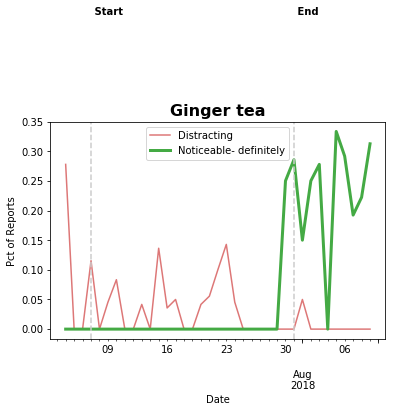

In [44]:
intervention = 'Nex'
def plot_prepost(df, intervention):
    assert intervention in df.intervention.unique()
    min_day = df[df.intervention == intervention].index.min()
    max_day = df[df.intervention == intervention].index.max()
    s = pd.get_dummies(df['outcome'])[['Distracting', 'Noticeable- definitely']].groupby(pd.Grouper(freq='1d')).mean()
    ax = s['Distracting'].plot(c='#DD7777')
    ax = s['Noticeable- definitely'].plot(linewidth=3, c='#44AA44')
    ax.axvline(min_day, c='#CCCCCC', linestyle='--')
    ax.text(min_day, .53, ' Start', fontdict={'weight':'bold'})
    ax.axvline(max_day, c='#CCCCCC', linestyle='--')
    ax.text(max_day, .53, ' End', fontdict={'weight':'bold'})
    ax.set_xlabel('Date')
    ax.set_ylabel('Pct of Reports')
    ax.set_title(intervention, fontdict={'weight':'bold', 'fontsize':16})
    ax.legend()
#     ax.get_figure().savefig('results/{}_{:%Y%m%d}.png'.format(intervention.replace(' ', '_'), pd.datetime.today()))
    return ax

_ = plot_prepost(pdf.df, 'Ginger tea')

In [52]:
outcomes = df.outcome.fillna('')
set(filter(lambda x: len(x), outcomes))

{'Distracting', 'Noticeable- barely', 'Noticeable- definitely', 'Totally fine'}

In [56]:
outcome 

['Totally fine', 'Noticeable- barely']

In [73]:
df[df.intervention == intervention]

intervention outcome
2018-07-09 17:08:54  Motion sickness medication     NaN
2018-07-16 17:38:14  Motion sickness medication     NaN
2018-07-19 16:24:57  Motion sickness medication     NaN
2018-07-20 14:45:08  Motion sickness medication     NaN
2018-07-27 14:56:10  Motion sickness medication     NaN
2018-07-30 21:05:21  Motion sickness medication     NaN
2018-08-01 20:31:38  Motion sickness medication     NaN
2018-07-07 13:49:51  Motion sickness medication     NaN

2018-07-04 20:22:00 2018-07-12 19:27:19 2018-07-22 23:08:58


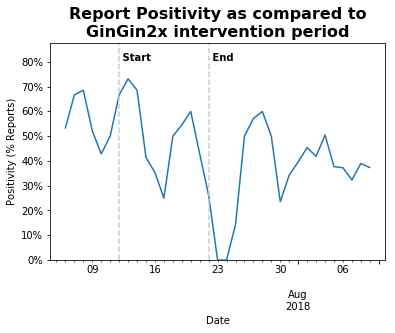

In [90]:
# Take intervention and good and bad outcome
df = pdf.df
positive_outcomes=['Totally fine', 'Noticeable- barely']
negative_outcomes=['Noticeable- definitely', 'Distracting']
intervention = 'GinGin2x' #'Ginger tea'

# Sanity check
if intervention not in df.intervention.unique():
    raise ValueError("Intervention {} is not in the dataset")

    outcomes = set(filter(lambda x: len(x), df.outcome.fillna('').unique()))
for outcome in positive_outcomes + negative_outcomes:
    if outcome not in outcomes:
        raise ValueError("Outcome {} is not in the dataset")


# Define data start, intervention start, and post-interventino start timestamp
data_start = df[df.outcome.isin(positive_outcomes+negative_outcomes)].index.min()
intervention_start = df[df.intervention == intervention].index.min()
intervention_end = df[df.intervention == intervention].index.max()
print(data_start, intervention_start, intervention_end)

# Calc % good 
outcome_cnt = pd.concat([
    df[df.outcome.isin(positive_outcomes)].groupby(pd.Grouper(freq='1d')).size(),
    df[df.outcome.isin(negative_outcomes)].groupby(pd.Grouper(freq='1d')).size(),
], axis=1, keys=['positive', 'negative'])
outcome_cnt['pct'] = outcome_cnt.positive.fillna(0).div(outcome_cnt.sum(axis=1))
outcome_cnt['pct_rolling3'] = outcome_cnt.positive.fillna(0).rolling(3).sum().div(outcome_cnt.sum(axis=1).rolling(3).sum())


# plot
ymax, ymin = outcome_cnt.pct_rolling3.apply([np.max, np.min])
yrange = ymax - ymin
label_height = ymin + yrange * 1.1

ax = outcome_cnt.pct_rolling3.plot()
ax.set_ylim([ymin, ymax*1.2])
ax.axvline(intervention_start, c='#CCCCCC', linestyle='--')
ax.text(intervention_start, label_height, ' Start', fontdict={'weight':'bold'})
ax.axvline(intervention_end, c='#CCCCCC', linestyle='--')
ax.text(intervention_end, label_height, ' End', fontdict={'weight':'bold'})
ax.set_xlabel('Date')
ax.set_ylabel('Positivity (% Reports)')
ax.set_title('Report Positivity as compared to\n{} intervention period'.format(intervention), fontdict={'weight':'bold', 'fontsize':16})
_ = ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])

In [79]:
outcome_cnt

positive  negative       pct  pct_rolling3
2018-07-04       NaN         5  0.000000           NaN
2018-07-05       2.0         0  1.000000           NaN
2018-07-06       6.0         0  1.000000      0.533333
2018-07-07       3.0         3  0.500000      0.666667
2018-07-08       3.0         0  1.000000      0.685714
2018-07-09       0.0         1  0.000000      0.521739
2018-07-10       0.0         2  0.000000      0.428571
2018-07-11       4.0         0  1.000000      0.500000
2018-07-12       4.0         0  1.000000      0.666667
2018-07-13       2.0         1  0.666667      0.731707
2018-07-14       2.0         0  1.000000      0.685714
2018-07-15       0.0         3  0.000000      0.413793
2018-07-16       1.0         1  0.500000      0.352941
2018-07-17       1.0         1  0.500000      0.250000
2018-07-18       2.0         0  1.000000      0.500000
2018-07-19       0.0         0       NaN      0.545455
2018-07-20       2.0         1  0.666667      0.600000
2018-07-21       0.0         1  0.000000      0.428571
2018-07-22       0.0         3  0.000000      0.260870
2018-07-23       0.0         4  0.000000      0.000000
2018-07-24       0.0         1  0.000000      0.000000
2018-07-25       1.0         0  1.000000      0.142857
2018-07-26       2.0         0  1.000000      0.500000
2018-07-27       1.0         0  1.000000      0.571429
2018-07-28       0.0         0       NaN      0.600000
2018-07-29       0.0         0       NaN      0.500000
2018-07-30       1.0         3  0.250000      0.235294
2018-07-31       3.0         4  0.428571      0.342508
2018-08-01       4.0         4  0.500000      0.396460
2018-08-02       5.0         5  0.500000      0.454054
2018-08-03       2.0         5  0.285714      0.418478
2018-08-04       5.0         0  1.000000      0.504505
2018-08-05       3.0        10  0.230769      0.377124
2018-08-06       3.0         7  0.300000      0.372493
2018-08-07       5.0         5  0.500000      0.323237
2018-08-08       3.0         4  0.428571      0.389676
2018-08-09       1.0         5  0.166667      0.373518